In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
##Loading the datsets
customers = pd.read_csv("C:/Users/Rahul Thakur/Downloads/Customers.csv")
products = pd.read_csv("C:/Users/Rahul Thakur/Downloads/Products.csv")
transactions = pd.read_csv("C:/Users/Rahul Thakur/Downloads/Transactions.csv")

In [4]:
print(customers.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [15]:
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [5]:
print(products.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [16]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [7]:
print(transactions.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [17]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

This indicates that datasetsdo not contains any null values.

In [8]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [9]:
# Merge datasets
merged_df = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [10]:
import seaborn as sns

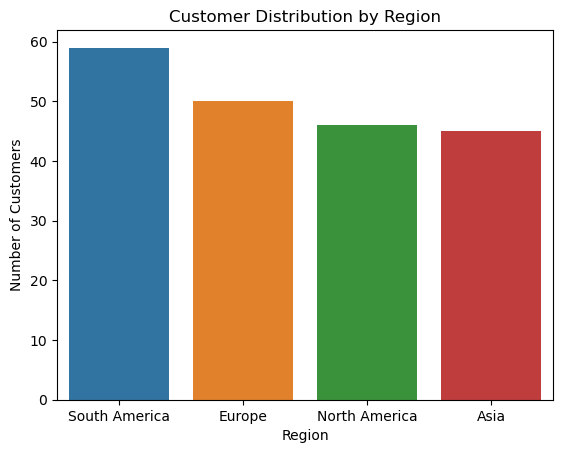

In [11]:
# Customer distribution by region
region_counts = customers['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

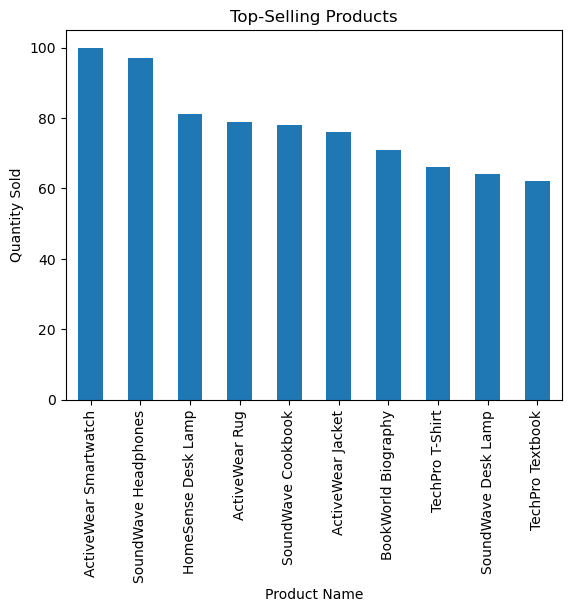

In [12]:
# Top-selling products
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title="Top-Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold")
plt.show()


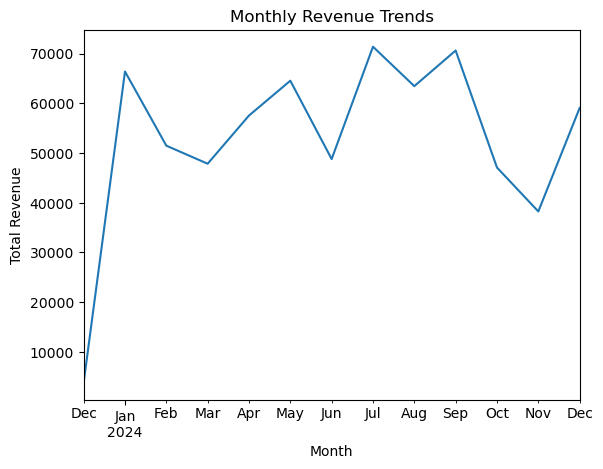

In [13]:
# Revenue trends over time
merged_df['TransactionMonth'] = merged_df['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_df.groupby('TransactionMonth')['TotalValue'].sum()
monthly_revenue.plot(kind='line', title="Monthly Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

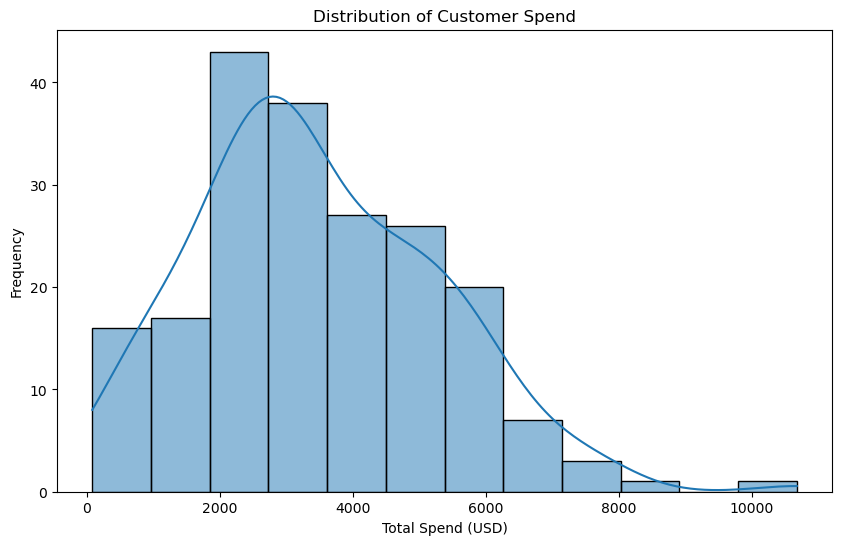

Average customer spend: $3467.31


In [18]:
# Group by CustomerID and calculate total spend
customer_spend = transactions.groupby('CustomerID')['TotalValue'].sum()

# Plot distribution of customer spending
plt.figure(figsize=(10, 6))
sns.histplot(customer_spend, kde=True)
plt.title('Distribution of Customer Spend')
plt.xlabel('Total Spend (USD)')
plt.ylabel('Frequency')
plt.show()

# Calculate the average customer spend
average_spend = customer_spend.mean()
print(f"Average customer spend: ${average_spend:.2f}")

In [19]:
# Step 1: Calculate total spend for each customer
customer_spend = transactions.groupby('CustomerID')['TotalValue'].sum()

# Step 2: Calculate the 90th percentile (top 10% of customers)
high_spending_threshold = customer_spend.quantile(0.9)

# Step 3: Identify high-spending customers (those who spent more than the 90th percentile)
high_spending_customers = customer_spend[customer_spend >= high_spending_threshold]

# Step 4: Display the high-spending customers
print(f"Number of high-spending customers: {len(high_spending_customers)}")
print(high_spending_customers)

# Step 5: Optional - Merge with the customers' dataset to get customer details
high_spending_customer_details = pd.merge(high_spending_customers, customers[['CustomerID', 'CustomerName', 'Region']], on='CustomerID')
print(high_spending_customer_details)


Number of high-spending customers: 20
CustomerID
C0013     6000.56
C0028     6819.57
C0041     6149.78
C0045     6021.80
C0054     8040.39
C0059     7073.28
C0065     7663.70
C0068     5950.42
C0082     7572.91
C0087     6604.23
C0096     6072.92
C0099     6715.72
C0102     6132.36
C0104     6579.10
C0141    10673.87
C0143     6044.63
C0156     7634.45
C0165     6708.10
C0175     6210.53
C0188     7111.32
Name: TotalValue, dtype: float64
   CustomerID  TotalValue          CustomerName         Region
0       C0013     6000.56       Lauren Buchanan  South America
1       C0028     6819.57         Jennifer Pena           Asia
2       C0041     6149.78        Lindsey Deleon         Europe
3       C0045     6021.80      Michael Williams           Asia
4       C0054     8040.39          Bruce Rhodes           Asia
5       C0059     7073.28  Mrs. Kimberly Wright  North America
6       C0065     7663.70          Gerald Hines  North America
7       C0068     5950.42              Mark Cox  North